## 量子テレポーテーション

### 量子テレポーテーションとは
量子テレポーテーションとは、量子のもつれを用いてある量子ビットの状態をほかの量子ビットに写す操作です。

クローン禁止定理があるので、量子ビットのコピーができるわけではありません。

### 手順
AliceとBob間での量子テレポーテーションは以下の操作で行われます。

テレポートしたいビット($q_0$)
もつれている量子ビット対($q_1, q_2$)

1. AliceとBobで量子ビット対を分け合う。
2. Aliceが送りたい量子ビット($q_0$)と、手元にあるもつれ量子ビット($q_1$)にCNOTを作用させたのち、$q_0$にHゲートを作用させる。
3. Aliceは$q_0, q_1$を測定すし、古典通信路でその結果をBobに転送する。
4. Bobは送られてきた結果をもとにX, Zゲートを$q_2$にHゲートを作用させる。

この４つの手順を踏むと$q_2$の状態は最初の$q_0$の状態と等しくなっている。

### 通信速度について
なお、手順3で測定結果を送る必要があるため、情報が光速以上で通信できるようになるわけではない。

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

In [2]:
#量子ビットの用意
q = QuantumRegister(3, name="q")

#X, Zゲートの操作のための古典通信路用意
crx = ClassicalRegister(1, name="crx")
crz = ClassicalRegister(1, name="crz")

#測定結果用
cr_Bob = ClassicalRegister(1, name="cr_Bob")

#量子回路構成
qc = QuantumCircuit(q, crx, crz, cr_Bob)

In [3]:
def get_count(qc, back_end="qasm_simulator", shots = 1024):
    back_end = Aer.get_backend(back_end)
    results = execute(qc, backend=back_end, shots=shots).result()
    count_num = results.get_counts()
    return count_num

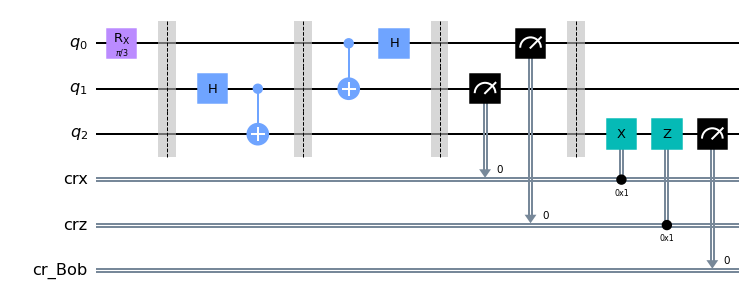

In [4]:
from numpy import pi

#送信したい量子ビットの用意
qc.rx(pi/3, 0)
qc.barrier()

#手順１ 量子もつれ作成
qc.h(1)
qc.cx(1, 2)
qc.barrier()

#手順2
qc.cx(0, 1)
qc.h(0)
qc.barrier()

#手順3
qc.measure(1, crx)
qc.measure(0, crz)
qc.barrier()

#手順4
qc.x(2).c_if(crx, 1)
qc.z(2).c_if(crz, 1)

#測定
qc.measure(2, cr_Bob)

qc.draw(output="mpl")



In [5]:

shots  =1024
count_num = get_count(qc, shots=shots)

#q_2の測定結果で集計
count_zero = 0
count_one = 0

for key in list(count_num.keys()):
    if key[0] == "0":
        count_zero += count_num[key]
    elif key[0] == "1":
        count_one += count_num[key]

print("Probabiliry of |0> : {:.3f}".format(count_zero / shots))
print("Probabiliry of |1> : {:.3f}".format(count_one / shots))

Probabiliry of |0> : 0.765
Probabiliry of |1> : 0.235


量子テレポーテーションをするために用意した量子ビットは$|q_0\rangle= \frac{1}{2} (\sqrt{3}|0\rangle+|1\rangle)$であるため、この結果は正しいらしい事が分かる。